# Euler-Maruyama Method

They consider the SDE:
$$
dx = -\nabla U(x) \, dt + \sigma \, dW_t
$$
where $x$ is the state, $- \nabla U(x)$ is the drift,  $\sigma$ the constant diffusion coefficient, and $W_t$ is a Wiener process.

In our example, $U(x)$ is given by:
$$
U(x) = - 2 (x^2 - 1)^2 x^2
$$
We also impose no-flux boundary conditions at $x=\pm 1$. 

In [11]:
import sympy as smp
from sympy import lambdify
import numpy as np
import matplotlib.pyplot as plt

In [12]:
# A small demo on how to use SymPy
x = smp.symbols('x')
U = - 2 * ((x**2 - 1)**2 ) * x**2
print(U)


grad_U = smp.diff(U, x).simplify()
print(grad_U)

U = smp.lambdify([x], U) # making it a Python function
grad_U = smp.lambdify([x], grad_U  ) # making it a Python function

-2*x**2*(x**2 - 1)**2
-12*x**5 + 16*x**3 - 4*x


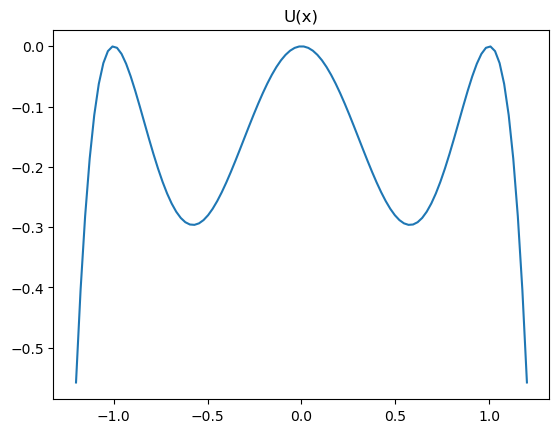

In [13]:
x = np.linspace(-1.2, 1.2, 100)
y = np.array(list(map(U, x)))

plt.plot(x, y)
plt.title("U(x)")
plt.show()

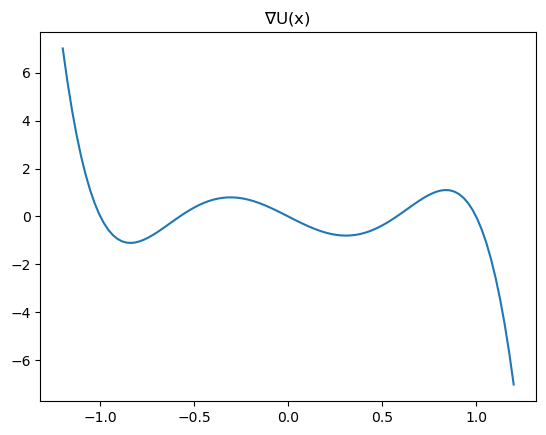

In [14]:
x = np.linspace(-1.2, 1.2, 100)
y = np.array(list(map(grad_U, x)))

plt.plot(x, y)
plt.title("$\\nabla$U(x) ")
plt.show()

We now integrate the SDE using the **Euler-Maruyama** method.

Recall the SDE:
$$
dx = -\nabla U(x) \, dt + \sigma \, dW_t
$$

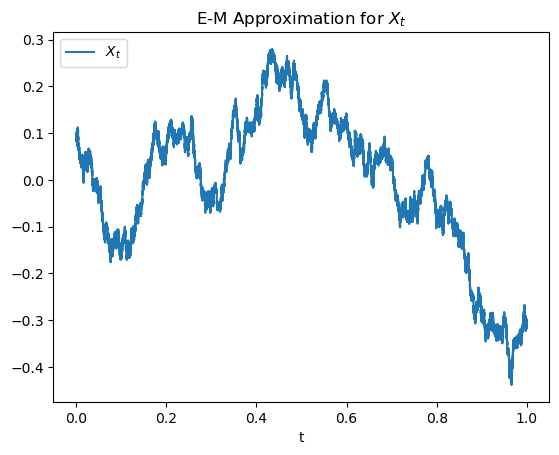

In [15]:
# SDE model parameters
mu = 2
sigma = 0.4
X0 = 0.1

## Simulation parameters
# Discretize time interval [0,T] in N chunks 0 = t_0 < ... < t_N=T
T = 0.1, 
N = 10**5
dt = 1 / N
t = np.arange(dt, 1 + dt, dt)  # Start at dt

# Create Brownian Motion
# increments of brownian motion are distributed as Sqrt(dt) * Normal(0,1)
np.random.seed(2)
dW = np.sqrt(dt) * np.random.randn(N) # randn(N) generates an array of N random numbers.
W  = np.cumsum(dW) # Brownian motion path, as sum of all the steps: 
# W = dW0 + dW1 + dW2 +... + dW(N-1) (the integral of Wt, since sigma is constant)

# EM Approximation - small dt
X_em = []
X = X0
for j in range(N):  
    mu =  - grad_U(X) # drift
    X += mu * dt + sigma * dW[j]
    X_em.append(X)
    
# Plot
plt.plot(t, X_em, label="$X_t$", ls='-')
plt.title('E-M Approximation for $X_t$')
plt.xlabel('t')
plt.legend(loc = 2)
plt.show()

## Obtain the time evolution of the PDF for the stochastic process

In [16]:
## the drift is: - grad_U

x = smp.symbols('x')
U = - 2 * ((x**2 - 1)**2 ) * x**2
print(U)


grad_U = smp.diff(U, x).simplify()
print(grad_U)

U = smp.lambdify([x], U) # making it a Python function
grad_U = smp.lambdify([x], grad_U  ) # making it a Python function

-2*x**2*(x**2 - 1)**2
-12*x**5 + 16*x**3 - 4*x


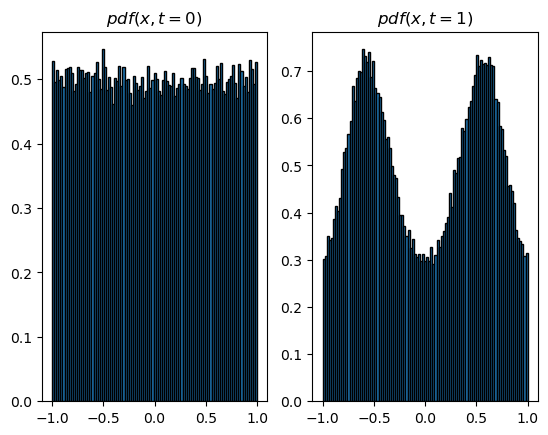

In [17]:
def integration_step(x, dt, z, sigma):
    mu = - grad_U(x) # drift
    dW = z * np.sqrt(dt) # Wiener process (z follows standard normal)
    xt = x + mu * dt + sigma * dW # SDE
    if abs(xt) < 1: # boundary condition, only take values between -1 and 1
        return xt
    else: # if the value of xt is greater than 1
        return x # do not consider xt but rather the x at the previous time step


dt = 0.01 # size of steps
T = 1 # final time
steps = int( T / dt) # number of steps ( T = n * dt)
n_sims = 10**5 # number of simulations
sigma = 0.8 # standard deviation of the noise

xt = np.random.uniform(-1,1,n_sims) # initial conditions, all points are uniformly distributed in [-1, 1]
x0 = np.copy(xt) # store initial conditions somewhere, will be plotted below
matrix = [] # initialize matrix for storing all info and for future plotting
for n in range(steps): # fix a time step
    Z = np.random.standard_normal(n_sims) # create N(0,1) array each time step with length n_sims
    for i in range(n_sims): # perform a simulation at each fixed time step
        xt[i] = integration_step(xt[i], dt, Z[i], sigma) # this performs the integration at a fixed time step for all the simulations
        # IMPORTANT: note that you need to already have some values in xt, otherwise you won't be able to input in it!
        matrix.append(xt[i]) # store all the values. Each sequence of n_sims numbers is a set of simulations at a fixed time step


fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.hist(x0, bins=np.linspace(-1,1,100), density=True, ec = "black" )
ax1.set_title("$pdf(x,t=0)$")

ax2.hist(xt, bins=np.linspace(-1,1,100), density=True, ec = "black" )
ax2.set_title("$pdf(x,t={})$".format(T))

plt.show()

### Visualization of the process and understanding of the PDF

In [18]:
print(np.shape(matrix))
matrix = np.reshape(matrix, (steps, n_sims))
print(np.shape(matrix))


(10000000,)
(100, 100000)


In [19]:
import pandas as pd
matrix = pd.DataFrame(matrix)
matrix

,0,1,2,3,4,5,6,7,8,9,...,99990,99991,99992,99993,99994,99995,99996,99997,99998,99999
0,0.767343,-0.766785,-0.764327,-0.224433,0.439339,-0.158314,0.834194,-0.884036,-0.859239,-0.540870,...,0.822841,-0.070624,0.635183,0.957059,0.383103,-0.583456,0.831560,-0.619998,0.485333,-0.133402
1,0.796332,-0.714380,-0.736813,-0.240813,0.479017,-0.024448,0.711453,-0.838006,-0.927894,-0.494085,...,0.865524,-0.028165,0.562348,0.913940,0.382761,-0.566988,0.829236,-0.728124,0.470703,-0.108239
2,0.733070,-0.690998,-0.608358,-0.183028,0.550371,-0.030326,0.754749,-0.943588,-0.848415,-0.385630,...,0.887482,-0.101535,0.539341,0.913940,0.256031,-0.577457,0.839007,-0.659142,0.613106,-0.079871
3,0.632328,-0.798504,-0.680308,-0.335800,0.608431,-0.032793,0.792623,-0.943588,-0.712126,-0.405898,...,0.935568,0.088954,0.564113,0.845875,0.303371,-0.727873,0.941128,-0.635072,0.608240,0.013759
4,0.678573,-0.879892,-0.754754,-0.349717,0.552358,0.034987,0.740156,-0.911189,-0.757328,-0.342762,...,0.884629,0.082951,0.665929,0.781619,0.288496,-0.667540,0.952991,-0.706600,0.527354,-0.024668
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.634193,-0.618542,-0.543678,-0.621077,0.454022,0.450293,-0.163457,0.303808,0.122556,-0.002726,...,0.709040,-0.526701,-0.700775,0.234894,-0.312716,-0.792040,0.931257,-0.472691,0.773022,0.361195
96,0.757128,-0.639459,-0.570030,-0.699537,0.509169,0.476358,-0.210777,0.270815,0.162934,0.020741,...,0.679433,-0.625114,-0.659377,0.207418,-0.298521,-0.710516,0.931257,-0.481593,0.673139,0.543816
97,0.728620,-0.627888,-0.545898,-0.663056,0.380145,0.528202,-0.310597,0.185890,0.190265,0.055691,...,0.647612,-0.657049,-0.678943,0.229530,-0.262768,-0.774031,0.848544,-0.443804,0.479383,0.494145
98,0.751089,-0.572195,-0.517988,-0.840870,0.310453,0.476778,-0.261529,0.118325,0.177308,-0.097549,...,0.711560,-0.557618,-0.627876,0.270070,-0.306520,-0.625198,0.978467,-0.592570,0.461738,0.479395


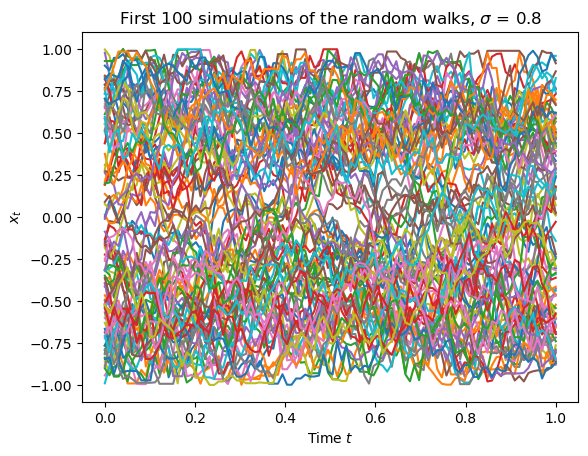

In [20]:

tt = np.linspace(0, T, steps)
K = 100

for i in range(K):
    plt.plot(tt, matrix.iloc[:, i:i+1])

plt.title("First {} simulations of the random walks, $\sigma$ = {}".format(K, sigma))
plt.xlabel("Time $t$")
plt.ylabel("$x_t$")
plt.show()

As you can notice, the Brownian paths are concentrated where the PDF has peaks. In other words, the PDF is giving us information about the localisation of the Brownian motions. 